Необходимо построить модель, которая на основании данных, поступающих каждую минуту, определяют качество продукции, производимое на обжиговой машине.

Обжиговая машина представляет из собой агрегат, состоящий из 5 одинаковых по размеру камер, в каждой камере установлено по 3 датчика температур. Кроме этого, для данной задачи Вы собрали данные о высоте слоя сырья и его влажности. Высота слоя и влажность измеряются при входе сырья в машину. Сырье проходит через обжиговую машину за час.
Данные с показателями работы обжиговой машины содержатся в файле X_data.csv:

Качество продукции измеряется в лаборатории по пробам, которые забираются каждый час, данные по известным анализам содержатся в файле Y_train.csv. В файле указано время забора пробы, проба забирается на выходе из обжиговой машины.
Вы договорились с заказчиком, что оценкой модели будет являться показатель MAE, для оценки модели необходимо сгенерировать предсказания за период, указанный в файле Y_submit.csv (5808 предиктов).
Все необходимые данные лежат по ссылке: 

In [1]:
import pandas as pd

In [2]:
X_data = pd.read_csv("../../r_data/X_data.csv", sep=";", index_col= 0,  parse_dates=True) 

In [3]:
# X_data.plot();

In [3]:
import numpy as np

def outliers_z_score(ys):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [4]:
len(outliers_z_score(X_data.T_data_1_1)[0])

18011

In [ ]:
len(X_data.T_data_1_1)

In [6]:
X_data_wo_out = X_data.copy(deep=True)

In [7]:
X_data.loc['2018-12-25':'2019'].plot();

In [8]:
Y_submit = pd.read_csv("../../r_data/Y_submit.csv", header=None, sep=";", index_col= 0,  parse_dates=True) 

In [9]:
Y_train = pd.read_csv("../../r_data/Y_train.csv", header=None, sep=";", index_col= 0,  parse_dates=True) 

In [10]:
Y_train.describe()

1
count  29184.000000
mean     402.800747
std       46.273228
min      221.000000
25%      372.000000
50%      408.000000
75%      439.000000
max      505.000000

In [11]:
Y_train.shape[0] + Y_submit.shape[0] 

34992

In [12]:
resampled = X_data.resample('60T', base=5).mean()

In [13]:
X_train = resampled[resampled.index.isin(Y_train.index)]

In [14]:
X_submit = resampled[resampled.index.isin(Y_submit.index)]

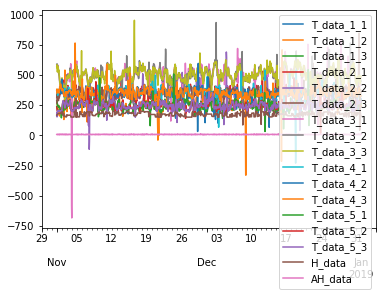

In [17]:
X_submit['2018-11':].plot();

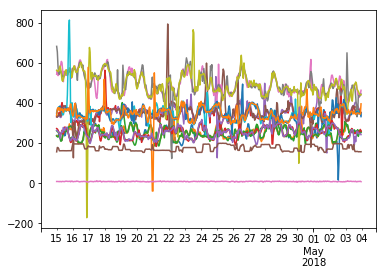

In [18]:
X_train['2018-4-15':].plot(legend = False);

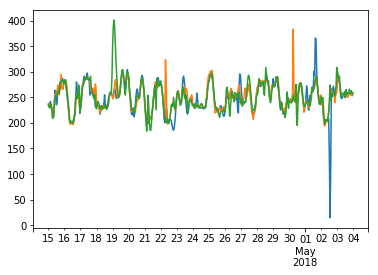

In [20]:
X_train.loc['2018-4-15':, :'T_data_1_3'].plot(legend = False);

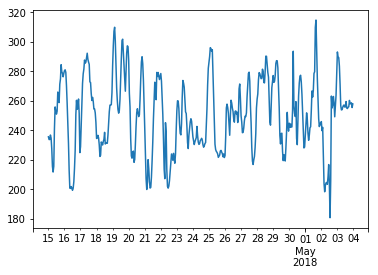

In [21]:
X_train.loc['2018-4-15':, :'T_data_1_3'].mean(axis=1).plot(legend = False);

In [22]:
X_train.columns[6]

'T_data_3_1'

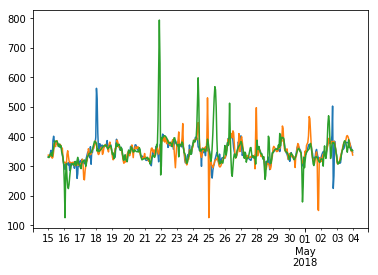

In [23]:
X_train.loc['2018-4-15':, X_train.columns[3]:X_train.columns[5]].plot(legend = False);

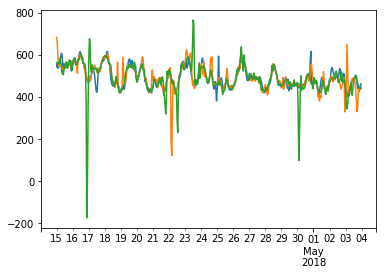

In [24]:
X_train.loc['2018-4-15':, X_train.columns[6]:X_train.columns[8]].plot(legend = False);

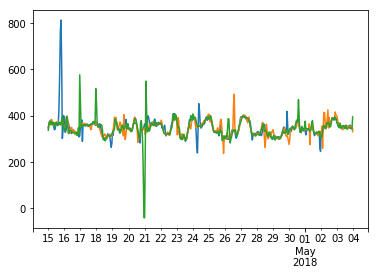

In [25]:
X_train.loc['2018-4-15':, X_train.columns[9]:X_train.columns[11]].plot(legend = False);

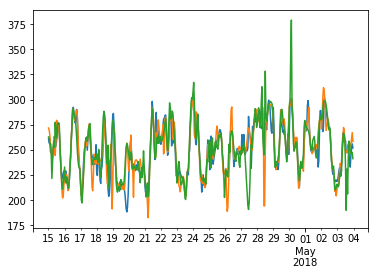

In [26]:
X_train.loc['2018-4-15':, X_train.columns[12]:X_train.columns[14]].plot(legend = False);

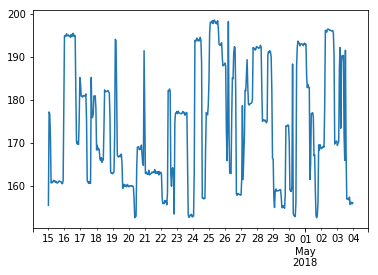

In [27]:
X_train.loc['2018-4-15':, X_train.columns[15]].plot(legend = False);

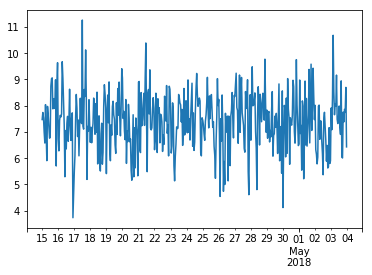

In [28]:
X_train.loc['2018-4-15':, X_train.columns[16]].plot(legend = False);

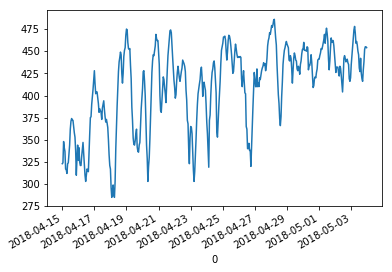

In [29]:
Y_train['2018-4-15':].plot(legend = False);

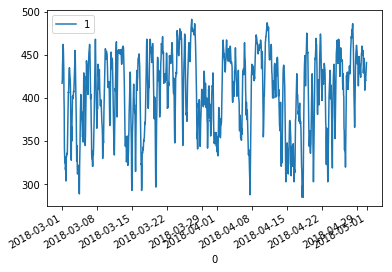

In [32]:
Y_train.loc['2018-03':'2018-04'].plot();

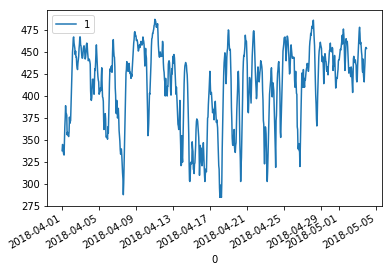

In [33]:
Y_train.loc['2018-04':].plot();

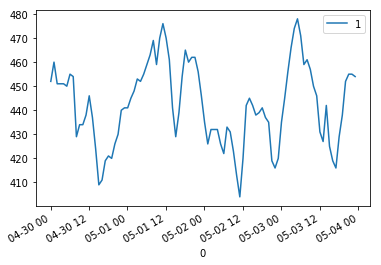

In [34]:
Y_train.loc['2018-04-30':].plot();

In [15]:
a, b = 0, 3
for i in range (5):
    X_train['mean_'+str(i+1)] = X_train.iloc[:, a:b ].mean(axis=1)
    a += 3
    b += 3
    

/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


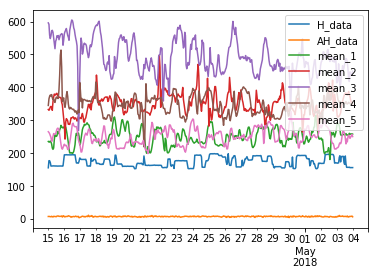

In [20]:
X_train.loc['2018-4-15':, 'H_data':].plot();

In [18]:
X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())

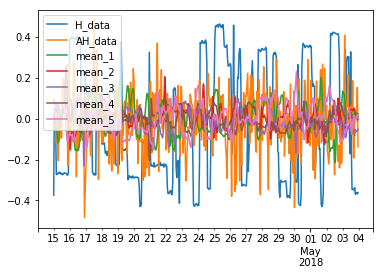

In [17]:
X_train_norm.loc['2018-4-15':, 'H_data':].plot()

In [39]:
import seaborn as sns
sns.set(style="ticks", color_codes=True);

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


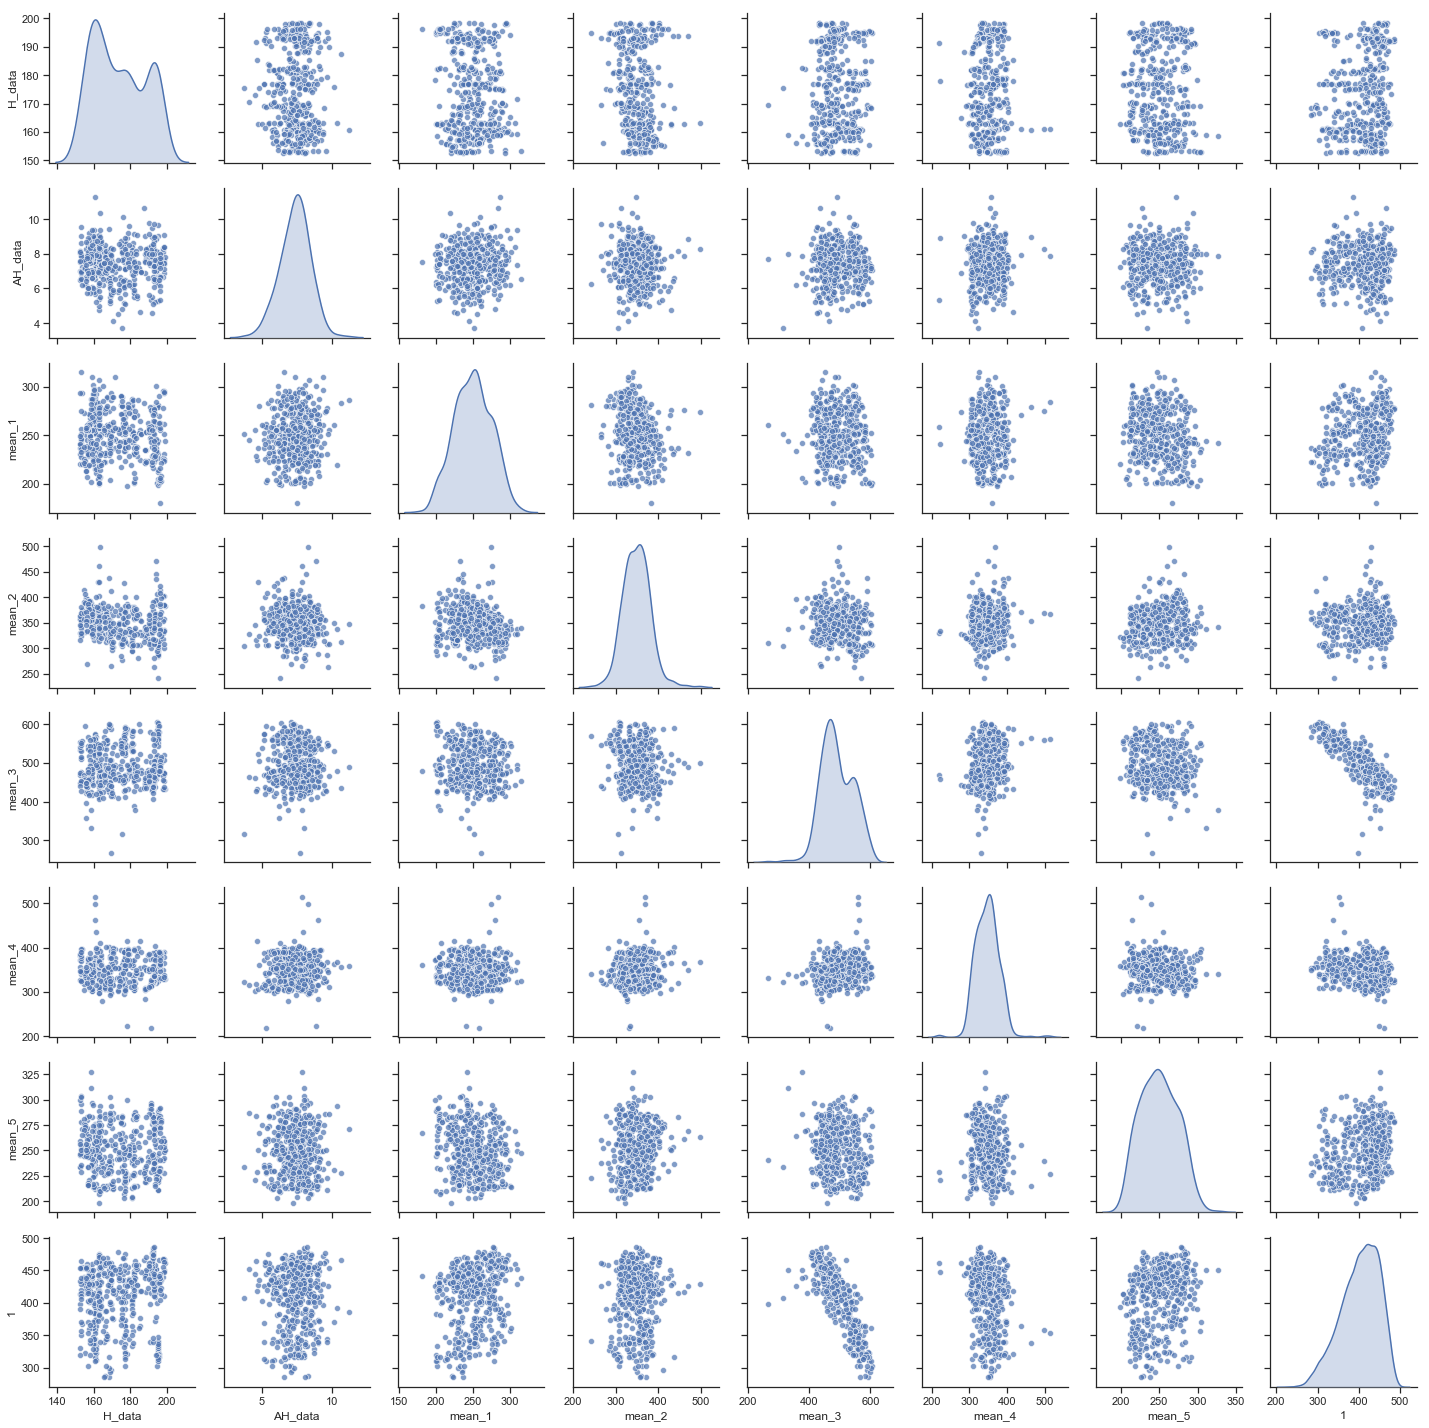

In [41]:
sns.pairplot(pd.concat([X_train.loc['2018-4-15':, 'H_data':],Y_train], axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/xenakas/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/xenakas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


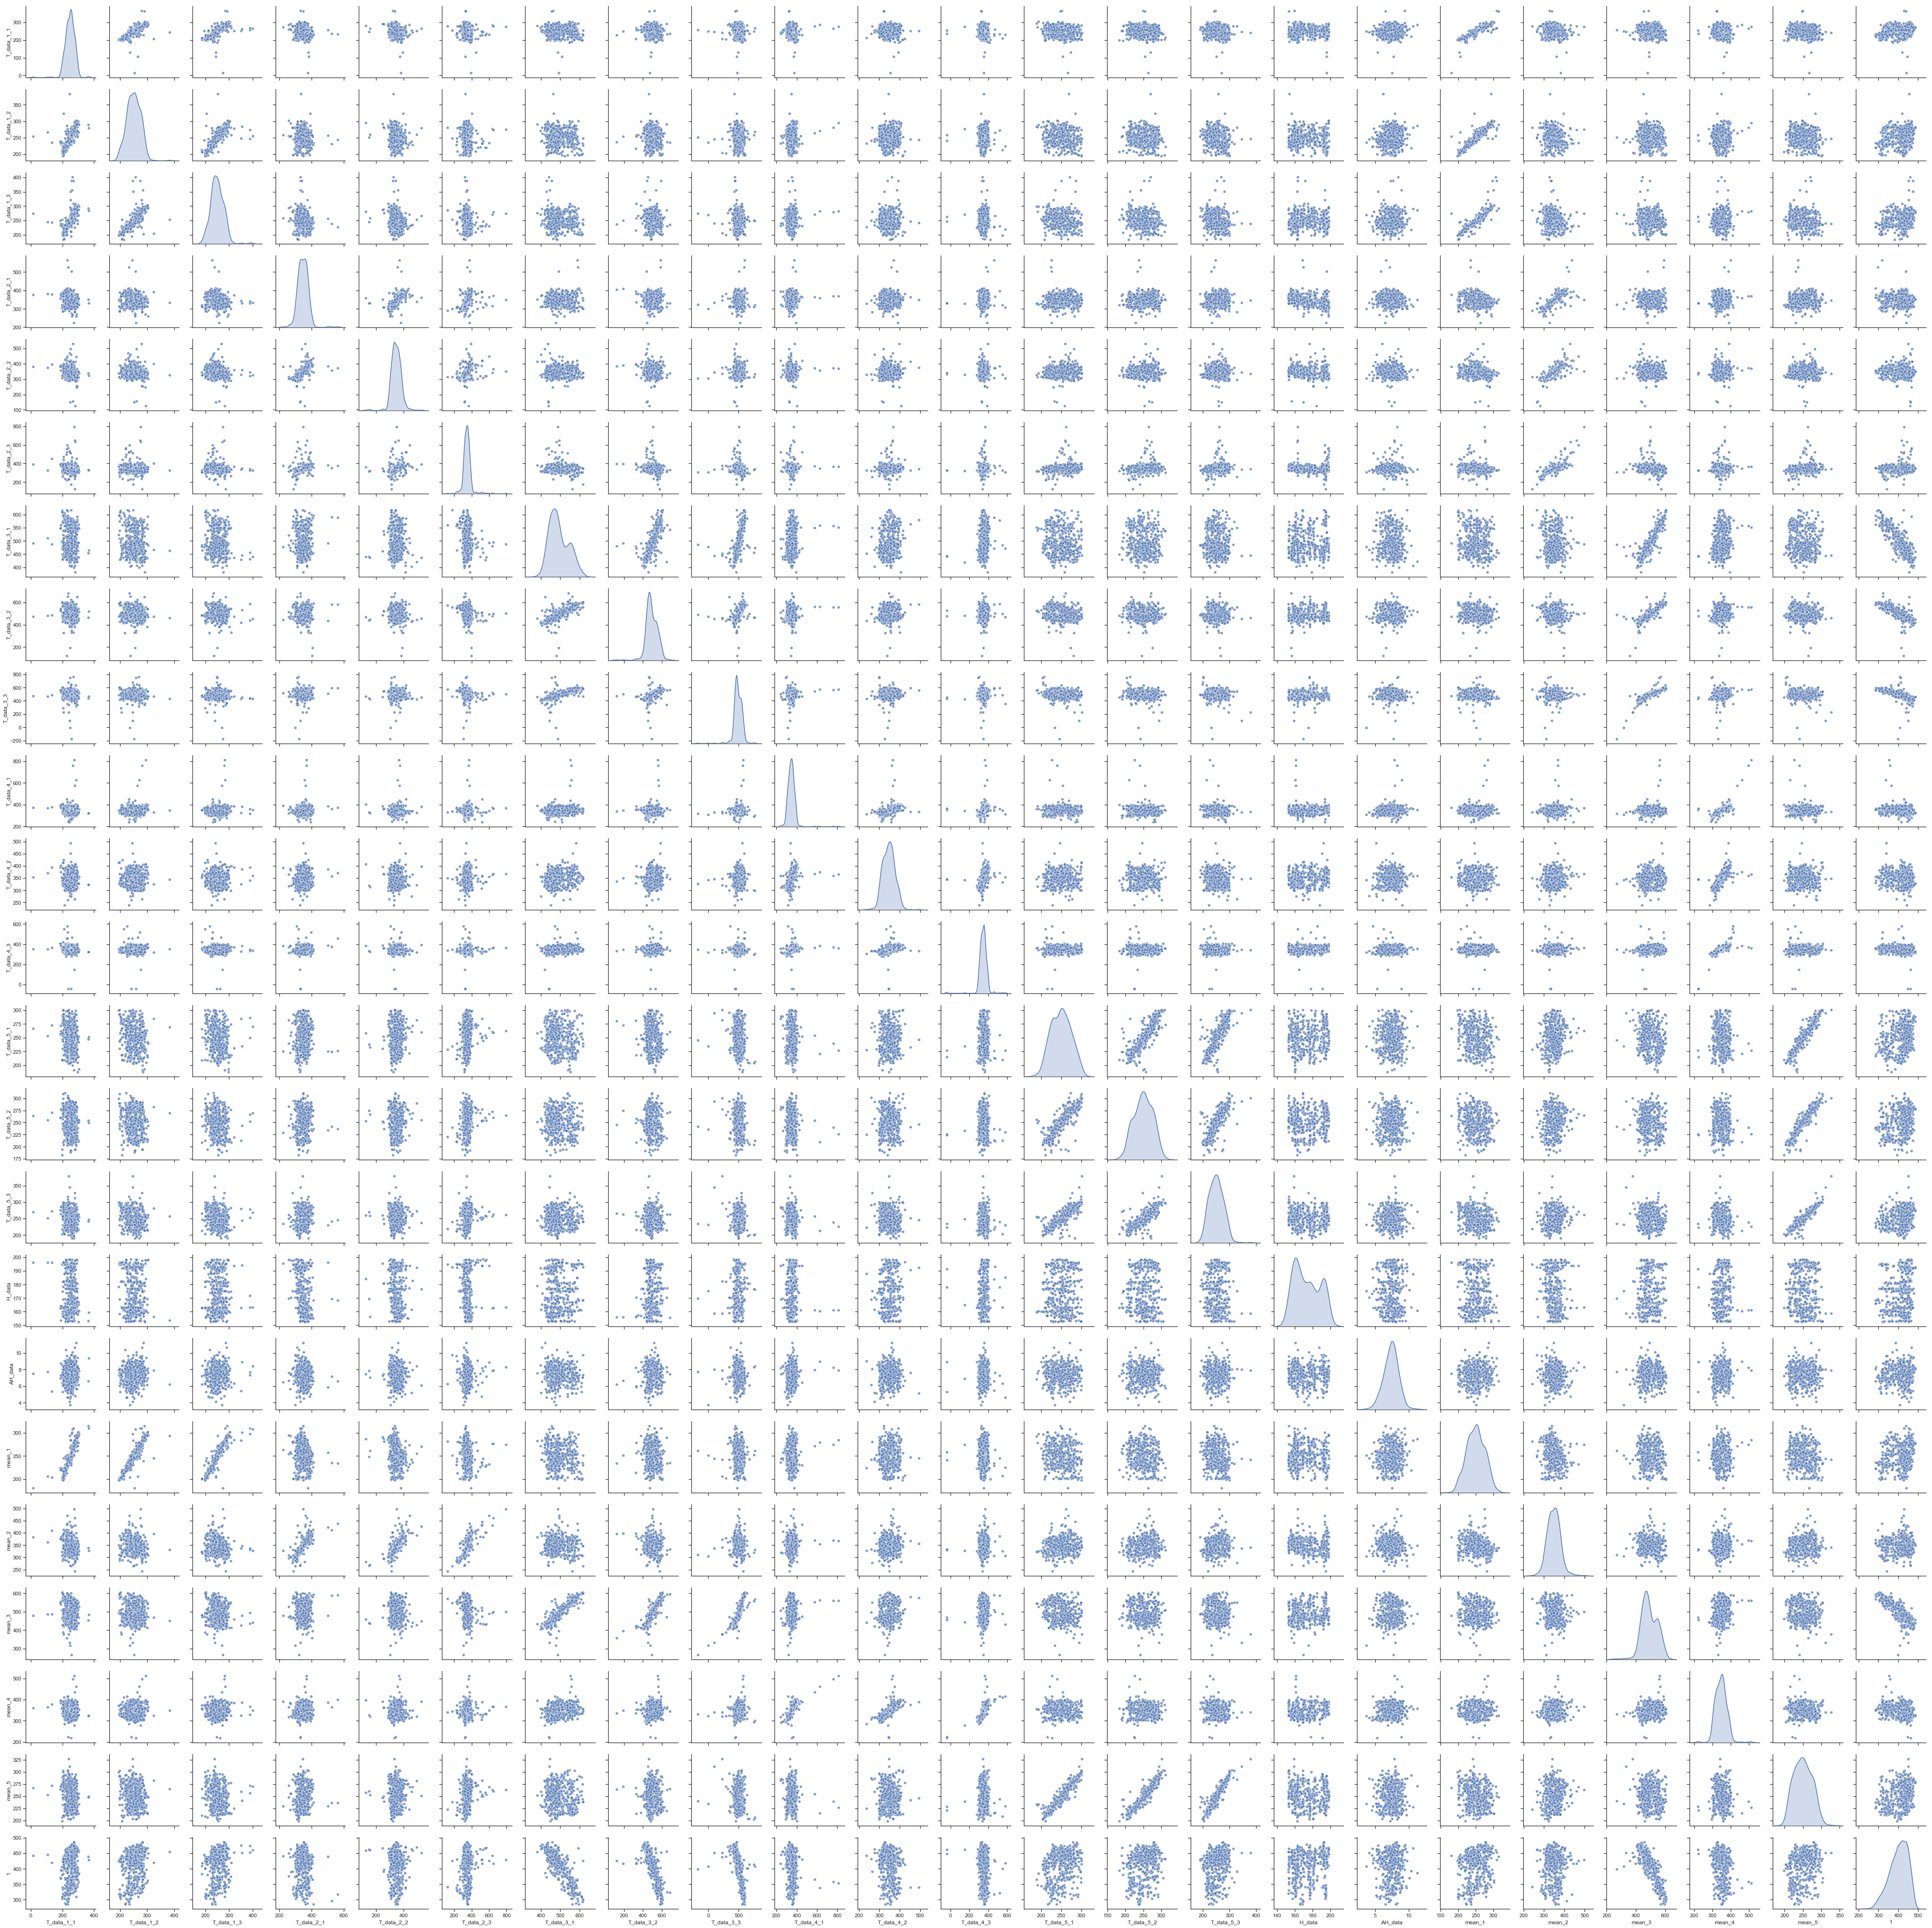

In [42]:
sns.pairplot(pd.concat([X_train.loc['2018-4-15':],Y_train], axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True));

In [22]:
X_train

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
2015-01-04 00:05:00  277.650000  294.433333  273.516667  320.300000   
2015-01-04 01:05:00  272.483333  228.566667  265.850000  323.166667   
2015-01-04 02:05:00  248.616667  228.633333  255.633333  326.700000   
2015-01-04 03:05:00  239.866667  239.433333  248.716667  325.466667   
2015-01-04 04:05:00  225.983333  229.650000  233.683333  319.583333   
2015-01-04 05:05:00  217.966667  212.250000  205.200000  312.350000   
2015-01-04 06:05:00  208.633333  208.866667  209.716667  310.000000   
2015-01-04 07:05:00  190.000000  210.466667  207.933333  310.250000   
2015-01-04 08:05:00  191.583333  211.000000  211.350000  311.000000   
2015-01-04 09:05:00  212.066667  208.700000  209.933333  310.250000   
2015-01-04 10:05:00  208.466667  204.116667  205.816667  306.983333   
2015-01-04 11:05:00  210.733333  200.600000  203.666667  302.400000   
2015-01-04 12:05:00  205.400000  201.266667  202.316667  300.133333   
2015-01-04 13:05:00  196.883333  205.450000  202.316667  301.833333   
2015-01-04 14:05:00  211.633333  211.000000  204.916667  311.966667   
2015-01-04 15:05:00  220.966667  217.500000  210.200000  325.183333   
2015-01-04 16:05:00  216.866667  223.116667  217.016667  305.733333   
2015-01-04 17:05:00  230.550000  227.200000  224.250000  296.183333   
2015-01-04 18:05:00  245.950000  248.100000  241.400000  290.850000   
2015-01-04 19:05:00  261.783333  281.966667  257.050000  285.383333   
2015-01-04 20:05:00  282.616667  246.550000  269.766667  304.933333   
2015-01-04 21:05:00  288.100000  290.783333  287.983333  298.550000   
2015-01-04 22:05:00  291.783333  301.766667  293.283333  305.666667   
2015-01-04 23:05:00  294.966667  297.616667  291.350000  309.266667   
2015-01-05 00:05:00  296.866667  301.966667  290.083333  325.300000   
2015-01-05 01:05:00  297.333333  300.483333  293.000000  344.650000   
2015-01-05 02:05:00  296.233333  295.600000  301.366667  353.333333   
2015-01-05 03:05:00  296.700000  296.683333  301.716667  350.316667   
2015-01-05 04:05:00  298.733333  298.000000  296.566667  345.983333   
2015-01-05 05:05:00  295.550000  297.200000  295.516667  345.316667   
...                         ...         ...         ...         ...   
2018-05-02 18:05:00  271.716667  258.766667  258.266667  224.650000   
2018-05-02 19:05:00  263.566667  254.600000  257.483333  266.966667   
2018-05-02 20:05:00  255.233333  239.433333  252.666667  384.266667   
2018-05-02 21:05:00  253.616667  252.816667  261.633333  364.050000   
2018-05-02 22:05:00  259.016667  260.550000  272.083333  352.600000   
2018-05-02 23:05:00  268.550000  258.750000  308.533333  335.166667   
2018-05-03 00:05:00  277.933333  299.500000  302.000000  313.616667   
2018-05-03 01:05:00  286.900000  291.750000  290.116667  313.216667   
2018-05-03 02:05:00  292.200000  290.450000  285.433333  311.000000   
2018-05-03 03:05:00  279.066667  280.750000  290.600000  312.333333   
2018-05-03 04:05:00  271.033333  270.950000  271.883333  309.650000   
2018-05-03 05:05:00  257.266667  262.333333  250.450000  312.483333   
2018-05-03 06:05:00  247.883333  257.666667  255.800000  337.416667   
2018-05-03 07:05:00  247.783333  257.000000  257.033333  349.466667   
2018-05-03 08:05:00  251.800000  257.000000  258.000000  356.366667   
2018-05-03 09:05:00  255.216667  257.000000  258.000000  357.400000   
2018-05-03 10:05:00  256.666667  257.000000  257.850000  359.950000   
2018-05-03 11:05:00  259.966667  256.700000  250.533333  369.000000   
2018-05-03 12:05:00  262.516667  255.816667  249.266667  380.700000   
2018-05-03 13:05:00  258.683333  254.533333  265.233333  380.700000   
2018-05-03 14:05:00  255.250000  252.716667  257.200000  379.633333   
2018-05-03 15:05:00  258.733333  250.100000  255.316667  379.000000   
2018-05-03 16:05:00  258.433333  250.716667  257.683333  379.900000   
2018-05-03 17:05:00  256.150000  253.983333  257.633333  380.933333   
2018-05-03 18:05:00  256.250000  258.416667  

In [19]:
train_features, test_features, train_y, test_y = X_train[:-5808], X_train[-5808:], Y_train[:-5808], Y_train[-5808:] 

In [20]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, random_state=42, n_estimators=100)
regr.fit(train_features, train_y)


/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
predictions = regr.predict(test_features)
predictions

array([477.38649456, 478.68282375, 480.05949691, ..., 462.89375229,
       458.80391851, 448.1078761 ])

In [22]:
test_plot = test_y.copy()

In [23]:
test_plot['2'] = predictions

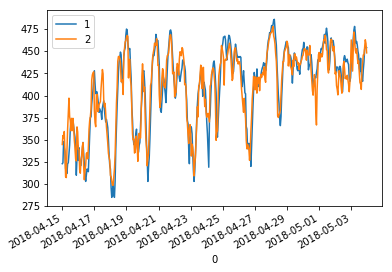

In [24]:
test_plot.loc['2018-4-15':, :].plot() 

In [25]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(test_y,np.repeat(420,5808))



39.71883608815427

In [26]:
mean_absolute_error(test_y,predictions)

13.66529846485404

In [27]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [28]:
mean_absolute_percentage_error(test_y.values, predictions)

13.091094191362028

In [33]:
importances = list(regr.feature_importances_)

In [38]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train.columns.values
, importances)]

In [45]:
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair)) 

Variable: T_data_1_1           Importance: 0.01
Variable: T_data_1_2           Importance: 0.01
Variable: T_data_1_3           Importance: 0.01
Variable: T_data_2_1           Importance: 0.0
Variable: T_data_2_2           Importance: 0.01
Variable: T_data_2_3           Importance: 0.01
Variable: T_data_3_1           Importance: 0.04
Variable: T_data_3_2           Importance: 0.03
Variable: T_data_3_3           Importance: 0.03
Variable: T_data_4_1           Importance: 0.0
Variable: T_data_4_2           Importance: 0.0
Variable: T_data_4_3           Importance: 0.0
Variable: T_data_5_1           Importance: 0.01
Variable: T_data_5_2           Importance: 0.01
Variable: T_data_5_3           Importance: 0.01
Variable: H_data               Importance: 0.03
Variable: AH_data              Importance: 0.0
Variable: mean_1               Importance: 0.01
Variable: mean_2               Importance: 0.0
Variable: mean_3               Importance: 0.75
Variable: mean_4               Importance: 0.0

These stats definitely prove that some variables are much more important to our problem than others! Given that there are so many variables with zero importance (or near-zero due to rounding), it seems like we should be able to get rid of some of them without impacting performance.

Tuning hyperparameters

In [46]:
from pprint import pprint
pprint(regr.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [53]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 250, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 150, 200, 250]}


In [62]:
rf = RandomForestRegressor(criterion = 'mae', random_state=38)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_features[20000:], train_y[20000:])

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 10.9min finished
/home/xenakas/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=38, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [63]:
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [64]:
best_random = rf_random.best_estimator_

In [65]:
best_random.fit(train_features,train_y)

/home/xenakas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=False, criterion='mae', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=38, verbose=0, warm_start=False)

In [66]:
best_predictions = best_random.predict(test_features)
best_predictions

array([479.836, 480.658, 481.496, ..., 459.594, 455.53 , 446.6  ])

In [67]:
test_plot['3'] = best_predictions

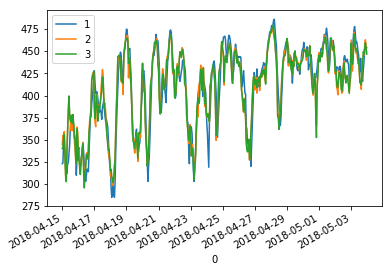

In [68]:
test_plot.loc['2018-4-15':, :].plot() 

In [32]:
mean_absolute_error(test_y,np.repeat(420,5808))

39.71883608815427

In [26]:
mean_absolute_error(test_y,predictions)

13.66529846485404

In [69]:
mean_absolute_error(test_y,best_predictions)

13.087920798898072

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features[15000:], train_y[15000:])

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [79]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt

In [84]:
periodogram(Y_train.values, 10e3 )

(array([0.]), array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]))

In [89]:
array_y = [i[0] for i in Y_train.values] 

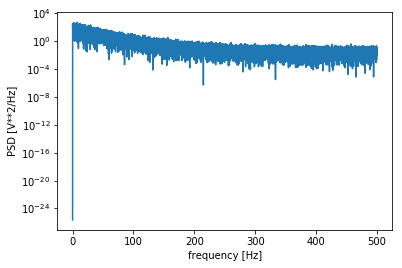

In [93]:
f, Pxx_den = periodogram(array_y, 1000 )
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()